In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import statsmodels as sm
import pandas as pd
import numpy as np

#!pip install pmdarima
#import pmdarima as pmd

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df_top20 = pd.read_csv('/content/drive/MyDrive/01_Statistical_Science/Thesis/Data/df_top20.csv')

In [ ]:
# Metrics
def smape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)

def rmse(actual, forecast):
  return(np.sqrt(mean_squared_error(actual, forecast)))  

## Simple Models

In [ ]:
# Naive Model
df_naive_complete = pd.DataFrame()

for i in df_top20.groupby('PULocationID'):
  A = i[1]

  df_naive = pd.concat([A['datetime'], A['count'], A['count'].shift(1)], axis = 1)
  df_naive.columns = ['datetime', 'y', 'y-1']

  df_naive_complete = df_naive_complete.append(df_naive, ignore_index = True)

df_naive_complete = df_naive_complete.dropna()

In [ ]:
train_naive_ss = df_naive_complete.loc[(pd.to_datetime(df_naive_complete['datetime']) < pd.to_datetime('2011-01-01 00:00:00'))]
test_naive_ss = df_naive_complete.loc[(pd.to_datetime(df_naive_complete['datetime']) > pd.to_datetime('2010-12-31 23:00:00'))&(pd.to_datetime(df_naive_complete['datetime']) < pd.to_datetime('2018-07-01 00:00:00'))]

In [ ]:
print('smape', smape(test_naive_ss['y'], test_naive_ss['y-1']))
print('rmse', rmse(test_naive_ss['y'], test_naive_ss['y-1']))

smape 26.416849263684377
rmse 133.76376612679718


#### ARIMA

In [ ]:
A = df_top20[df_top20['PULocationID']==237]
train_ARIMA_ss_237 = A.loc[(pd.to_datetime(A['datetime']) < pd.to_datetime('2011-01-01 00:00:00'))]
test_ARIMA_ss_237 = A.loc[(pd.to_datetime(A['datetime']) > pd.to_datetime('2010-12-31 23:00:00'))&(pd.to_datetime(A['datetime']) < pd.to_datetime('2012-01-01 00:00:00'))]

train_series = pd.Series(data = train_ARIMA_ss_237['count'].values, index = train_ARIMA_ss_237['datetime'])
train_series.index = pd.to_datetime(train_series.index, format = '%H', errors = 'ignore')
#series.index = series.index.freq('H')

test_series = pd.Series(data = test_ARIMA_ss_237['count'].values, index = test_ARIMA_ss_237['datetime'])
test_series.index = pd.to_datetime(test_series.index, format = '%H', errors = 'ignore')

In [ ]:
model = sm.tsa.arima.model.ARIMA(train_series, order = (24, 0, 4))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local

In [ ]:
test_series.values

array([149,  78,  35, ..., 700, 602, 544])

In [ ]:
rmse(test_series.values, model_fit.forecast(8757).values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


498.6364241014085

In [ ]:
## ARIMA
def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

arima_model = arimamodel(train_naive_ss['y'])
arima_model.summary()

automodel.predict(len(test))

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4398998.152, Time=131.64 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5096916.291, Time=6.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4483053.952, Time=7.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4735148.662, Time=88.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5538949.324, Time=3.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4379867.016, Time=59.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4379894.446, Time=13.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4379868.211, Time=115.14 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4376364.992, Time=312.02 sec


In [ ]:
train_series = pd.Series(data = train_naive_ss['y'].values, index = train_naive_ss['datetime'])
train_series.index = pd.to_datetime(train_series.index, format = '%H', errors = 'ignore')
#series.index = series.index.freq('H')

test_series = pd.Series(data = test_naive_ss['y'].values, index = test_naive_ss['datetime'])
test_series.index = pd.DatetimeIndex(test_series.index, freq = 'H')

ValueError: ignored

In [ ]:
model = sm.tsa.arima.model.ARIMA(series, order = (1, 0, 4))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               350378
Model:                 ARIMA(1, 0, 4)   Log Likelihood            -2190883.399
Date:                Mon, 03 May 2021   AIC                        4381780.799
Time:                        08:25:13   BIC                        4381856.166
Sample:                             0   HQIC                       4381802.455
                             - 350378                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.9212      2.097    264.635      0.000     550.811     559.031
ar.L1          0.7342      0.002    421.969      0.000       0.731       0.738
ma.L1          0.6300      0.002    334.240      0.000       0.626       0.634
ma.L2          0.3062      0.003    121.219      0.000       0.301       0.311
ma.L3          0.1682      0.002     68.077      0.000       0.163       0.173
ma.L4          0.1077      0.002     57.616      0.000       0.104       0.111
sigma2       1.58e+04     22.248    710.322      0.000    1.58e+04    1.58e+04
===================================================================================
Ljung-Box (L1) (Q):                  25.93   Jarque-Bera (JB):            378127.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_series.index

Index(['2011-01-03 00:00:00', '2011-01-03 01:00:00', '2011-01-03 02:00:00',
       '2011-01-03 03:00:00', '2011-01-03 04:00:00', '2011-01-03 05:00:00',
       '2011-01-03 06:00:00', '2011-01-03 07:00:00', '2011-01-03 08:00:00',
       '2011-01-03 09:00:00',
       ...
       '2018-06-30 14:00:00', '2018-06-30 15:00:00', '2018-06-30 16:00:00',
       '2018-06-30 17:00:00', '2018-06-30 18:00:00', '2018-06-30 19:00:00',
       '2018-06-30 20:00:00', '2018-06-30 21:00:00', '2018-06-30 22:00:00',
       '2018-06-30 23:00:00'],
      dtype='object', name='datetime', length=1313846)

In [ ]:
output = model_fit.predict(n_periods = 10, index = test_series.index)

ValueError: ignored

## Complex Models

### Feature engineering

In [ ]:
df_complex_complete = pd.DataFrame()

for i in df_top20.groupby('PULocationID'):
  A = i[1]

  df_complex = pd.concat([A['datetime'], A['pickup_day_of_week'].astype(str)+'-'+A['PULocationID'].astype(str), np.cos((A['pickup_hour']*2*np.pi)/24), 
           np.sin((A['pickup_hour']*2*np.pi)/24), np.cos((A['pickup_hour']*2*np.pi)/12),  np.sin((A['pickup_hour']*2*np.pi)/12), A['count'], 
           A['count'].shift(1), A['count'].shift(2),A['count'].shift(3), A['count'].shift(4),A['count'].shift(5), A['count'].shift(6), 
           A['count'].shift(7), A['count'].shift(8), A['count'].shift(9), A['count'].shift(10),A['count'].shift(11), A['count'].shift(12), 
           A['count'].shift(13), A['count'].shift(14), A['count'].shift(15), A['count'].shift(16), A['count'].shift(17), A['count'].shift(18), 
           A['count'].shift(19), A['count'].shift(20), A['count'].shift(21), A['count'].shift(22),   A['count'].shift(23), A['count'].shift(24), 
           A['count'].shift(168), A['count'].shift(336), A['count'].shift(504), A['count'].shift(672)], axis = 1)

  df_complex.columns = ['datetime', 'categorical', 'cos_hour', 'sin_hour', 'cos_month', 'sin_month', 'y', 'y-1', 'y-2', 'y-3', 'y-4',
                      'y-5', 'y-6', 'y-7', 'y-8', 'y-9', 'y-10', 'y-11', 'y-12','y-13', 'y-14', 'y-15', 'y-16','y-17', 'y-18', 'y-19', 'y-20',
                      'y-21', 'y-22', 'y-23', 'y-24', 'y-1w', 'y-2w', 'y-3w', 'y-4w']
  df_complex_complete = df_complex_complete.append(df_complex, ignore_index = True) 

#one_hot_encoded = pd.Categorical(df_complex_complete['categorical'], ordered = True)      

In [ ]:
df_final = df_complex_complete.join(pd.get_dummies(df_complex_complete['categorical'])).dropna()

In [ ]:
df_train = df_final.loc[(pd.to_datetime(df_final['datetime']) < pd.to_datetime('2011-01-01 00:00:00'))]
X_train = df_train.drop(['datetime', 'categorical','y'], axis = 1)
y_train = df_train['y']

In [ ]:
df_2010 = df_final.loc[(pd.to_datetime(df_final['datetime']) > pd.to_datetime('2010-12-31 23:00:00'))&(pd.to_datetime(df_final['datetime']) < pd.to_datetime('2012-01-01 00:00:00'))]
X_2010 = df_2010.drop(['datetime', 'categorical','y'], axis = 1)
y_2010 = df_2010['y']

In [ ]:
df_2013 = df_final.loc[(pd.to_datetime(df_final['datetime']) > pd.to_datetime('2012-12-31 23:00:00'))&(pd.to_datetime(df_final['datetime']) < pd.to_datetime('2014-01-01 00:00:00'))]
X_2013 = df_2013.drop(['datetime', 'categorical','y'], axis = 1)
y_2013 = df_2013['y']

### XGBoost

In [ ]:
def PlotTuningResults3D(grid, param_test, parameter1, parameter2):
    m = len(param_test[parameter1])
    n = len(param_test[parameter2])
    
    param_name1 = 'param_' + parameter1
    param_name2 = 'param_' + parameter2
    X = np.reshape(grid.cv_results_[param_name1].data,[n,m])
    Y = np.reshape(grid.cv_results_[param_name2].data,[n,m])
    Z = np.reshape(grid.cv_results_['mean_test_score'],[n,m])
    
    Y = np.array(Y, dtype = float)
    X = np.array(X, dtype = float)
    
    fig = plt.figure(figsize = (12,8))
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(parameter1, size = 13)
    ax.set_ylabel(parameter2, size = 13)
    ax.set_zlabel('Test explained variance', size = 13)

    plt.show()

In [ ]:
dtrain = xgb.DMatrix(data = X_train, label=list(y_train.values))

In [ ]:
xgb_final = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators=100,
    max_depth=4,
    min_child_weight=3,
    min_split_loss=0,
    col_sample_bytree = 0.9,
    subsample = .85,
    req_alpha = 100,
    objective= 'reg:squarederror',
    tree_method = 'auto',
    seed=248,
    n_jobs = -1)

In [ ]:
#xgb_final.get_xgb_params()
#xgb_final.fit(X_train, y_train)
y_pred = xgb_final.predict(X_2010)

In [ ]:
print(rmse(y_2010, y_pred))
print(smape(y_2010, y_pred))

78.48236147702661
12.56654744029642


In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 10.3MB/s 


In [ ]:
from skopt import dump, load
old_result = load('results.pkl')

In [ ]:
# Using a random forest to optimize
from skopt import forest_minimize
from sklearn.model_selection import cross_val_score

def tune_xgbc(params):
# Implementation learned on a lesson of Mario Filho (Kagle Grandmaster) for parametes optmization.
# Link to the video: https://www.youtube.com/watch?v=WhnkeasZNHI

    """Function to be passed as scikit-optimize minimizer/maximizer input

    Parameters:
    Tuples with information about the range that the optimizer should use for that parameter, 
    as well as the behaviour that it should follow in that range.

    Returns:
    float: the metric that should be minimized. If the objective is maximization, then the negative 
    of the desired metric must be returned. In this case, the negative AUC average generated by CV is returned.
    """


    #Hyperparameters to be optimized
    print(params)
    learning_rate = params[0] 
    n_estimators = params[1] 
    max_depth = params[2]
    min_child_weight = params[3]
    gamma = params[4]
    subsample = params[5]
    colsample_bytree = params[6]


    #Model to be optimized
    mdl = xgb.XGBRegressor(learning_rate = learning_rate, 
                            n_estimators = n_estimators, 
                            max_depth = max_depth, 
                            min_child_weight = min_child_weight, 
                            gamma = gamma, 
                            subsample = subsample, 
                            colsample_bytree = colsample_bytree, seed = 42)


    #Cross-Validation in order to avoid overfitting
    nmse = cross_val_score(mdl, X_train, y_train, cv = 2, scoring = 'neg_mean_squared_error')

    print(nmse.mean())
    # as the function is minimization (forest_minimize), we need to use the negative of the desired metric (AUC)
    return -nmse.mean()

# Creating a sample space in which the initial randomic search should be performed
space = [(1e-3, 1e-1, 'log-uniform'), # learning rate
          (10, 100), # n_estimators
          (1, 10), # max_depth 
          (1, 6.), # min_child_weight 
          (0, 0.5), # gamma 
          (0.5, 1.), # subsample 
          (0.5, 1.)] # colsample_bytree 

# Minimization using a random forest with 20 random samples and 50 iterations for Bayesian optimization.
result = forest_minimize(tune_xgbc, space, random_state = 42, n_initial_points = 0, n_calls  = 20, verbose = 1, 
                         x0=old_result.x_iters, y0=old_result.func_vals)

dump(result, 'results.pkl')

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.2558
Function value obtained: 9699.3127
Current minimum: 7282.6287
Iteration No: 2 started. Evaluating function at random point.
[0.03100755104854603, 80, 1, 1.8848008401521952, 0.07630164550464431, 0.897727196098095, 0.8251005976857382]
[11:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-27413.27945699627
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 44.6510
Function value obtained: 27413.2795
Current minimum: 7282.6287
Iteration No: 3 started. Evaluating function at random point.
[0.043656350333307205, 30, 2, 2.7335224266640044, 0.13774657215377425, 0.9264126360906078, 0.8008086012607645]
[11:18:50] WARNING: /workspace/src/objective/

In [ ]:
result.x

[0.06759574377750831,
 82,
 8,
 3.247253370691017,
 0.04770505824520567,
 0.6854091260991332,
 0.8344206263318037]

In [ ]:
best_model = xgb.XGBRegressor(learning_rate = result.x[0], 
                            n_estimators = 1000, 
                            max_depth = result.x[2], 
                            min_child_weight = result.x[3], 
                            gamma = result.x[4], 
                            subsample = result.x[5], 
                            colsample_bytree = result.x[6], seed = 42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_2010)

print(rmse(y_2010, y_pred))
print(smape(y_2010, y_pred))

[13:06:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
63.98500983861954
9.907622161831956


best: [0.06759574377750831, 82, 8, 3.247253370691017, 0.04770505824520567, 0.6854091260991332, 0.8344206263318037] = 7282.6287

In [ ]:
xgb1 = xgb.XGBRegressor(
    n_estimators=1000,
    objective= 'reg:squarederror',
    learning_rate = 0.06759574377750831,
    max_depth = 8,
    min_child_weight = 3.247253370691017,
    gamma = 0.04770505824520567,
    subsample = 0.6854091260991332,
    colsample_bytree = 0.8344206263318037,
    tree_method = 'auto',
    n_jobs = -1,
    seed=248)

cvresult = xgb.cv(xgb1.get_xgb_params(), dtrain, num_boost_round=xgb1.n_estimators, nfold=2,
                      metrics='rmse', early_stopping_rounds=10)
cvresult.shape[0]

1000

In [ ]:
cvresult

In [ ]:
# CV for optimal max depth and child weight
param_test1 = {
 'max_depth':range(1,11,1),
 'min_child_weight':range(1,11,1)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(n_estimators=500, 
                                                     objective= 'reg:squarederror',
                                                     tree_method = 'auto',
                                                     seed=248), 
                        param_grid = param_test1, 
                        n_jobs = -1,
                        cv=2,
                        verbose = 3)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 57.4min


KeyboardInterrupt: ignored

In [ ]:
# CV for optimal max depth and child weight
param_test1 = {
 'max_depth':range(1,11,5),
 'min_child_weight':range(0,11,5)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(n_estimators=50, 
                                                     objective= 'reg:squarederror',
                                                     tree_method = 'auto',
                                                     seed=248), 
                        param_grid = param_test1, 
                        n_jobs = -1,
                        cv=4,
                        verbose = 3)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 20.8min finished


{'max_depth': 6, 'min_child_weight': 10}

In [ ]:
# CV for optimal max depth and child weight
param_test1 = {
 'max_depth':range(1,11,1),
# 'min_child_weight':range(0,11,5)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(n_estimators=100, 
                                                     objective= 'reg:squarederror',
                                                     tree_method = 'auto',
                                                     seed=248), 
                        param_grid = param_test1, 
                        n_jobs = -1,
                        cv=4,
                        verbose = 3,
                        scoring = 'neg_mean_absolute_percentage_error')
gsearch1.fit(X_train,y_train)
gsearch1.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 53.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 107.2min finished


{'max_depth': 7}

In [ ]:
xgb2 = xgb.XGBRegressor(
    n_estimators=100,
    objective= 'reg:squarederror',
    tree_method = 'auto',
    max_depth = 7,
    n_jobs = -1,
    seed=248)

cvresult = xgb.cv(xgb2.get_xgb_params(), dtrain, num_boost_round=xgb2.n_estimators, nfold=4, early_stopping_rounds=10)
cvresult.shape[0]

100

In [ ]:
param_test2 = {'min_split_loss':[i/100.0 for i in range(0,50, 10)]}
gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor(n_estimators=10, 
                                                     objective= 'reg:squarederror',
                                                     tree_method = 'hist',
                                                     seed=248,
                                                    max_depth = 7), 
                        param_grid = param_test2,
                        n_jobs = -1,
                        cv=4,
                        verbose = 3,
                        scoring = 'neg_mean_squared_error')
gsearch2.fit(X_train,y_train)
gsearch2.best_params_

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished


{'min_split_loss': 0.0}

In [ ]:
xgb3 = xgb.XGBRegressor(
    n_estimators=50,
    objective= 'reg:squarederror',
    tree_method = 'auto',
    max_depth = 7,
    min_split_loss = 0,
    n_jobs = -1,
    seed=248)

cvresult = xgb.cv(xgb3.get_xgb_params(), dtrain, num_boost_round=xgb3.n_estimators, nfold=4,
                      metrics='rmse', early_stopping_rounds=50)
cvresult.shape[0]

In [ ]:
param_test3 = {'subsample':[i/100.0 for i in range(5,105, 5)],
               'colsample_bytree':[i/100.0 for i in range(0,105, 5)]}

gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor( n_estimators=10, 
                                                  max_depth=7,
                                                  min_split_loss = 0,
                                                  objective = 'reg:squarederror',
                                                  tree_method = 'auto',
                                                  seed=248),
                        param_grid = param_test3, 
                        n_jobs=-1,
                        cv=4,
                        verbose = 3,
                        scoring = 'neg_mean_squared_error')
gsearch3.fit(X_train,y_train)
gsearch3.best_params_

Fitting 4 folds for each of 420 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 75.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 140.5min


In [ ]:
model = xgb.XGBRegressor()

# Grid of hyperparameters to search over
#param_grid_gb = {'learning_rate': [0.01,0.1,0.5,0.9],
#              'n_estimators' : [2],
#              'subsample' : [0.3,0.5,0.9]}

param_grid_gb = {'learning_rate': [0.1],
              'n_estimators' : [100],
              'subsample' : [0.5]}

mse_grid = GridSearchCV(estimator = model, param_grid = param_grid_gb, scoring = 'neg_mean_squared_error', cv = 4, verbose = 3, n_jobs = -1)
mse_grid.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
mse_grid.best_params_; np.sqrt(-1*mse_grid.best_score_)

260.0150604820292

In [ ]:
model = xgb.XGBRegressor()

# Grid of hyperparameters to search over
param_random_gb = {'learning_rate': np.arange(0.05,1.05, 0.05),
              'n_estimators' : [2],
              'subsample' : np.arange(0.05,1.05, 0.05)}

mse_random = RandomizedSearchCV(estimator = model, param_distributions= param_random_gb, n_iter = 25, scoring = 'neg_mean_squared_error', cv = 4, verbose = 3, n_jobs = -1)
mse_random.fit(X_train, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
mse_random.best_params_

8 fits > 43.0s

In [ ]:
model.fit(X_train, y_train)

[12:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

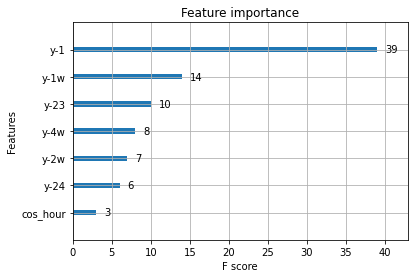

In [ ]:
# Plot the top 7 features
xgb.plot_importance(model, max_num_features=7)

In [ ]:
y_pred_2013 = model.predict(X_2013)
y_pred_ss = model.predict(X_ss)

In [ ]:
print(smape(y_ss, y_pred_ss))
print(rmse(y_ss, y_pred_ss))

20.259797571404867
98.63485639845517
